In [43]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input,InputLayer
from keras.models import load_model
from keras.callbacks import TensorBoard
from sklearn.preprocessing import RobustScaler
import os
import tensorflow as tf

# 데이터 불러오기

In [64]:
total_data = pd.read_csv('features.csv', index_col=0)

In [65]:
display(total_data.head())

,prob,human_len,ai_len,crop_time,image_time,similarity,correct
0,0.999907,9.0,9.0,1469.0,9676.175212,1.000000,0.0
1,0.984349,11.0,10.0,2086.0,13740.300539,0.952381,0.0
2,0.529631,6.0,6.0,1248.0,8220.467436,0.000000,0.0
3,0.377639,11.0,9.0,1692.0,11145.056813,0.500000,0.0
4,0.999989,7.0,7.0,2854.0,14746.805014,1.000000,1.0


# 감지하려는 필드 변경
현재 0이 부정확한 데이터고, 1이 정확한 데이터이다. 부전확한 데이터를 감지하려는 목적이므로 기존의 correct 필드의 값에서 0을 1로, 1을 0으로 변경한다

In [66]:
total_data['label'] = total_data.correct.apply(lambda cor: 1 if cor == 0 else 0)
display(total_data.head())

,prob,human_len,ai_len,crop_time,image_time,similarity,correct,label
0,0.999907,9.0,9.0,1469.0,9676.175212,1.000000,0.0,1
1,0.984349,11.0,10.0,2086.0,13740.300539,0.952381,0.0,1
2,0.529631,6.0,6.0,1248.0,8220.467436,0.000000,0.0,1
3,0.377639,11.0,9.0,1692.0,11145.056813,0.500000,0.0,1
4,0.999989,7.0,7.0,2854.0,14746.805014,1.000000,1.0,0


# 이상치 제거

In [67]:
total_data = total_data[total_data['image_time'] <= 60000]
total_data = total_data[total_data['human_len'] <= 35]

# 전체 데이터 상관 계수

In [68]:
display(total_data.corr())

,prob,human_len,ai_len,crop_time,image_time,similarity,correct,label
prob,1.000000,0.135503,0.066145,0.252626,0.249097,0.705993,0.570449,-0.570449
human_len,0.135503,1.000000,0.861611,0.185042,0.253152,0.148362,0.293540,-0.293540
ai_len,0.066145,0.861611,1.000000,0.101246,0.149941,0.048072,0.111771,-0.111771
crop_time,0.252626,0.185042,0.101246,1.000000,0.788011,0.262756,0.281393,-0.281393
image_time,0.249097,0.253152,0.149941,0.788011,1.000000,0.271185,0.304088,-0.304088
similarity,0.705993,0.148362,0.048072,0.262756,0.271185,1.000000,0.631305,-0.631305
correct,0.570449,0.293540,0.111771,0.281393,0.304088,0.631305,1.000000,-1.000000
label,-0.570449,-0.293540,-0.111771,-0.281393,-0.304088,-0.631305,-1.000000,1.000000


# 산점도 그래프

In [69]:
# sns.pairplot(total_data, diag_kind='kde', hue='correct', palette='bright')
# plt.show()

# 데이터 셋을 feature와 label로 분리

In [70]:
features = total_data[['prob', 'human_len', 'ai_len', 'image_time', 'similarity']]
labels = total_data[['label']]

# display(features.head())
# display(labels.head())

# 데이터 시각화 - hist

In [71]:
def visual_hist(features, columns=None, figsize=(12,6)):
    if columns is None:
        columns = features.columns
    
    fig, ax = plt.subplots(2, math.ceil(len(columns)/2), figsize=figsize)
    
    for i, col in enumerate(columns):
        if i % 2 == 0:
            try:
                ax[0][int(i/2)].hist(features[col], bins=40)
                ax[0][int(i/2)].set_title(col)
            except:
                ax[0].hist(features[col], bins=40)
                ax[0].set_title(col)
        else:
            try:
                ax[1][int(i/2)].hist(features[col], bins=40)
                ax[1][int(i/2)].set_title(col)
            except:
                ax[1].hist(features[col], bins=40)
                ax[1].set_title(col)

    plt.show()

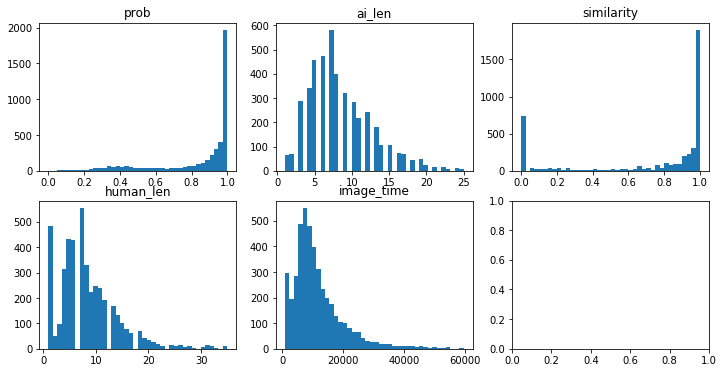

In [72]:
visual_hist(features)

# 데이터 정규화 RobustScaler
이거 안 쓰는거 같은데 왜 정의된 겨..?

In [73]:
# def scaler_robust(train, test, columns=None):
#     robustScaler = RobustScaler()
#     train_scaled = robustScaler.fit_transform(train)
#     test_scaled = robustScaler.transform(test)

#     if columns is None:
#         train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
#         test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

#     else :
#         train_scaled = pd.DataFrame(train_scaled, columns=columns)
#         test_scaled = pd.DataFrame(test_scaled, columns=columns)
    
#     return train_scaled, test_scaled

# 데이터 셋 나누기

In [74]:
x_train, x_dev, y_train, y_dev = train_test_split(features, labels, test_size = 0.3)# train / dev & test 셋은 7 대 3
x_dev, x_test, y_dev, y_test = train_test_split(x_dev, y_dev, test_size = 0.5) # dev/test 셋의 크기는 동일하게 나눔

In [75]:
print(len(x_train), len(x_dev), len(x_test))

3115 667 668


In [76]:
robustScaler = RobustScaler()
std_train = robustScaler.fit_transform(x_train)
std_dev = robustScaler.transform(x_dev)
std_test = robustScaler.transform(x_test)

# 모델 결과 시각화

In [77]:
def visual_model_performance(loss_accuracy_recall_precision, pred_and_label):
    print ("Test Accuracy = " + str(loss_accuracy_recall_precision[1]))
    print ("Test Recall = " + str(loss_accuracy_recall_precision[2]))
    print ("Test Precision = " + str(loss_accuracy_recall_precision[3]))

    sns.scatterplot(data=pred_and_label, x='index', y='prob', hue='label')

In [78]:
def visual_training(hist):
    fig, loss_ax = plt.subplots(1,2, figsize=(12,5))

    loss_ax[0].set_title("model loss")
    loss_ax[1].set_title("model accuracy")

    loss_ax[0].plot(hist.history['loss'], 'y', label='train loss')
    loss_ax[0].plot(hist.history['val_loss'], 'r', label='val loss')
    try:
        loss_ax[1].plot(hist.history['accuracy'], 'b', label='train accuracy')
        loss_ax[1].plot(hist.history['val_accuracy'], 'g', label='val accuracy')
    except:
        loss_ax[1].plot(hist.history['acc'], 'b', label='train accuracy')
        loss_ax[1].plot(hist.history['val_acc'], 'g', label='val accuracy')


    loss_ax[0].set_xlabel('epoch')
    loss_ax[1].set_xlabel('epoch')

    loss_ax[0].set_ylabel('loss')
    loss_ax[1].set_ylabel('accuray')

    loss_ax[0].legend(loc='upper left')
    loss_ax[1].legend(loc='upper left')

    plt.show()

# Compare model

## Model 1

Train on 3115 samples, validate on 667 samples
Epoch 1/500
3115/3115 [==============================] - 1s 274us/step - loss: 0.5486 - accuracy: 0.7872 - recall: 0.0221 - precision: 0.2735 - val_loss: 0.4922 - val_accuracy: 0.7781 - val_recall: 0.0083 - val_precision: 0.2609
Epoch 2/500
3115/3115 [==============================] - 0s 78us/step - loss: 0.4342 - accuracy: 0.8161 - recall: 0.0220 - precision: 0.4211 - val_loss: 0.3749 - val_accuracy: 0.8936 - val_recall: 0.0952 - val_precision: 0.7854
Epoch 3/500
3115/3115 [==============================] - 0s 76us/step - loss: 0.3509 - accuracy: 0.8883 - recall: 0.1885 - precision: 0.8426 - val_loss: 0.3193 - val_accuracy: 0.8786 - val_recall: 0.2732 - val_precision: 0.8098
Epoch 4/500
3115/3115 [==============================] - 0s 83us/step - loss: 0.3370 - accuracy: 0.8896 - recall: 0.3240 - precision: 0.7893 - val_loss: 0.3078 - val_accuracy: 0.8981 - val_recall: 0.3639 - val_precision: 0.8058
Epoch 5/500
3115/3115 [=================

Epoch 37/500
3115/3115 [==============================] - 0s 75us/step - loss: 0.2629 - accuracy: 0.9082 - recall: 0.5624 - precision: 0.9417 - val_loss: 0.2591 - val_accuracy: 0.9055 - val_recall: 0.5628 - val_precision: 0.9423
Epoch 38/500
3115/3115 [==============================] - 0s 76us/step - loss: 0.2569 - accuracy: 0.9104 - recall: 0.5631 - precision: 0.9429 - val_loss: 0.2648 - val_accuracy: 0.8981 - val_recall: 0.5633 - val_precision: 0.9433
Epoch 39/500
3115/3115 [==============================] - 0s 83us/step - loss: 0.2646 - accuracy: 0.9091 - recall: 0.5634 - precision: 0.9437 - val_loss: 0.2637 - val_accuracy: 0.8921 - val_recall: 0.5635 - val_precision: 0.9442
Epoch 40/500
3115/3115 [==============================] - 0s 78us/step - loss: 0.2620 - accuracy: 0.9114 - recall: 0.5636 - precision: 0.9445 - val_loss: 0.2517 - val_accuracy: 0.9055 - val_recall: 0.5641 - val_precision: 0.9448
Epoch 41/500
3115/3115 [==============================] - 0s 77us/step - loss: 0.258

Epoch 73/500
3115/3115 [==============================] - 0s 77us/step - loss: 0.2564 - accuracy: 0.9063 - recall: 0.5700 - precision: 0.9593 - val_loss: 0.2680 - val_accuracy: 0.8981 - val_recall: 0.5701 - val_precision: 0.9595
Epoch 74/500
3115/3115 [==============================] - 0s 82us/step - loss: 0.2484 - accuracy: 0.9098 - recall: 0.5700 - precision: 0.9597 - val_loss: 0.2667 - val_accuracy: 0.8966 - val_recall: 0.5701 - val_precision: 0.9599
Epoch 75/500
3115/3115 [==============================] - 0s 77us/step - loss: 0.2522 - accuracy: 0.9075 - recall: 0.5700 - precision: 0.9600 - val_loss: 0.2541 - val_accuracy: 0.8996 - val_recall: 0.5701 - val_precision: 0.9599
Epoch 76/500
3115/3115 [==============================] - 0s 76us/step - loss: 0.2549 - accuracy: 0.9066 - recall: 0.5701 - precision: 0.9600 - val_loss: 0.2438 - val_accuracy: 0.9085 - val_recall: 0.5701 - val_precision: 0.9602
Epoch 77/500
3115/3115 [==============================] - 0s 77us/step - loss: 0.248

Epoch 109/500
3115/3115 [==============================] - 0s 84us/step - loss: 0.2489 - accuracy: 0.9072 - recall: 0.5743 - precision: 0.9641 - val_loss: 0.2515 - val_accuracy: 0.9055 - val_recall: 0.5744 - val_precision: 0.9641
Epoch 110/500
3115/3115 [==============================] - 0s 72us/step - loss: 0.2410 - accuracy: 0.9124 - recall: 0.5744 - precision: 0.9642 - val_loss: 0.2617 - val_accuracy: 0.9055 - val_recall: 0.5745 - val_precision: 0.9643
Epoch 111/500
3115/3115 [==============================] - 0s 77us/step - loss: 0.2472 - accuracy: 0.9079 - recall: 0.5746 - precision: 0.9644 - val_loss: 0.2470 - val_accuracy: 0.9025 - val_recall: 0.5745 - val_precision: 0.9644
Epoch 112/500
3115/3115 [==============================] - 0s 78us/step - loss: 0.2447 - accuracy: 0.9095 - recall: 0.5745 - precision: 0.9645 - val_loss: 0.2565 - val_accuracy: 0.9010 - val_recall: 0.5745 - val_precision: 0.9646
Epoch 113/500
3115/3115 [==============================] - 0s 84us/step - loss: 

Epoch 145/500
3115/3115 [==============================] - 0s 71us/step - loss: 0.2353 - accuracy: 0.9120 - recall: 0.5788 - precision: 0.9664 - val_loss: 0.2469 - val_accuracy: 0.8996 - val_recall: 0.5789 - val_precision: 0.9664
Epoch 146/500
3115/3115 [==============================] - 0s 70us/step - loss: 0.2389 - accuracy: 0.9149 - recall: 0.5789 - precision: 0.9664 - val_loss: 0.2544 - val_accuracy: 0.9040 - val_recall: 0.5791 - val_precision: 0.9664
Epoch 147/500
3115/3115 [==============================] - 0s 66us/step - loss: 0.2400 - accuracy: 0.9104 - recall: 0.5791 - precision: 0.9664 - val_loss: 0.2642 - val_accuracy: 0.9010 - val_recall: 0.5791 - val_precision: 0.9664
Epoch 148/500
3115/3115 [==============================] - 0s 75us/step - loss: 0.2331 - accuracy: 0.9133 - recall: 0.5792 - precision: 0.9665 - val_loss: 0.2541 - val_accuracy: 0.9025 - val_recall: 0.5792 - val_precision: 0.9665
Epoch 149/500
3115/3115 [==============================] - 0s 94us/step - loss: 

Epoch 181/500
3115/3115 [==============================] - 0s 78us/step - loss: 0.2315 - accuracy: 0.9130 - recall: 0.5824 - precision: 0.9672 - val_loss: 0.2449 - val_accuracy: 0.9085 - val_recall: 0.5825 - val_precision: 0.9672
Epoch 182/500
3115/3115 [==============================] - 0s 71us/step - loss: 0.2308 - accuracy: 0.9101 - recall: 0.5826 - precision: 0.9670 - val_loss: 0.2691 - val_accuracy: 0.8996 - val_recall: 0.5826 - val_precision: 0.9670
Epoch 183/500
3115/3115 [==============================] - 0s 70us/step - loss: 0.2374 - accuracy: 0.9117 - recall: 0.5826 - precision: 0.9671 - val_loss: 0.2518 - val_accuracy: 0.8981 - val_recall: 0.5826 - val_precision: 0.9671
Epoch 184/500
3115/3115 [==============================] - 0s 69us/step - loss: 0.2255 - accuracy: 0.9175 - recall: 0.5827 - precision: 0.9671 - val_loss: 0.2743 - val_accuracy: 0.9025 - val_recall: 0.5828 - val_precision: 0.9671
Epoch 185/500
3115/3115 [==============================] - 0s 74us/step - loss: 

Epoch 217/500
3115/3115 [==============================] - 0s 78us/step - loss: 0.2355 - accuracy: 0.9127 - recall: 0.5855 - precision: 0.9675 - val_loss: 0.2562 - val_accuracy: 0.8921 - val_recall: 0.5855 - val_precision: 0.9675
Epoch 218/500
3115/3115 [==============================] - 0s 72us/step - loss: 0.2313 - accuracy: 0.9120 - recall: 0.5855 - precision: 0.9675 - val_loss: 0.2707 - val_accuracy: 0.9055 - val_recall: 0.5855 - val_precision: 0.9675
Epoch 219/500
3115/3115 [==============================] - 0s 75us/step - loss: 0.2254 - accuracy: 0.9169 - recall: 0.5856 - precision: 0.9675 - val_loss: 0.2811 - val_accuracy: 0.8981 - val_recall: 0.5857 - val_precision: 0.9675
Epoch 220/500
3115/3115 [==============================] - 0s 74us/step - loss: 0.2305 - accuracy: 0.9149 - recall: 0.5857 - precision: 0.9675 - val_loss: 0.2642 - val_accuracy: 0.8996 - val_recall: 0.5857 - val_precision: 0.9675
Epoch 221/500
3115/3115 [==============================] - 0s 77us/step - loss: 

Epoch 253/500
3115/3115 [==============================] - 0s 71us/step - loss: 0.2191 - accuracy: 0.9191 - recall: 0.5892 - precision: 0.9674 - val_loss: 0.2552 - val_accuracy: 0.9100 - val_recall: 0.5893 - val_precision: 0.9674
Epoch 254/500
3115/3115 [==============================] - 0s 69us/step - loss: 0.2219 - accuracy: 0.9185 - recall: 0.5893 - precision: 0.9674 - val_loss: 0.2623 - val_accuracy: 0.9085 - val_recall: 0.5894 - val_precision: 0.9674
Epoch 255/500
3115/3115 [==============================] - 0s 69us/step - loss: 0.2250 - accuracy: 0.9169 - recall: 0.5896 - precision: 0.9673 - val_loss: 0.2598 - val_accuracy: 0.9100 - val_recall: 0.5897 - val_precision: 0.9672
Epoch 256/500
3115/3115 [==============================] - 0s 68us/step - loss: 0.2193 - accuracy: 0.9191 - recall: 0.5898 - precision: 0.9672 - val_loss: 0.2649 - val_accuracy: 0.9100 - val_recall: 0.5899 - val_precision: 0.9672
Epoch 257/500
3115/3115 [==============================] - 0s 88us/step - loss: 

Epoch 289/500
3115/3115 [==============================] - 0s 94us/step - loss: 0.2217 - accuracy: 0.9159 - recall: 0.5941 - precision: 0.9665 - val_loss: 0.2578 - val_accuracy: 0.9115 - val_recall: 0.5941 - val_precision: 0.9665
Epoch 290/500
3115/3115 [==============================] - 0s 92us/step - loss: 0.2173 - accuracy: 0.9213 - recall: 0.5942 - precision: 0.9665 - val_loss: 0.2569 - val_accuracy: 0.9115 - val_recall: 0.5943 - val_precision: 0.9665
Epoch 291/500
3115/3115 [==============================] - 0s 89us/step - loss: 0.2207 - accuracy: 0.9162 - recall: 0.5944 - precision: 0.9664 - val_loss: 0.2629 - val_accuracy: 0.9100 - val_recall: 0.5945 - val_precision: 0.9663
Epoch 292/500
3115/3115 [==============================] - 0s 88us/step - loss: 0.2221 - accuracy: 0.9169 - recall: 0.5946 - precision: 0.9664 - val_loss: 0.2511 - val_accuracy: 0.9085 - val_recall: 0.5946 - val_precision: 0.9663
Epoch 293/500
3115/3115 [==============================] - 0s 83us/step - loss: 

Epoch 325/500
3115/3115 [==============================] - 0s 80us/step - loss: 0.2216 - accuracy: 0.9172 - recall: 0.5989 - precision: 0.9658 - val_loss: 0.2768 - val_accuracy: 0.8981 - val_recall: 0.5989 - val_precision: 0.9658
Epoch 326/500
3115/3115 [==============================] - 0s 89us/step - loss: 0.2189 - accuracy: 0.9204 - recall: 0.5989 - precision: 0.9658 - val_loss: 0.2675 - val_accuracy: 0.9055 - val_recall: 0.5990 - val_precision: 0.9658
Epoch 327/500
3115/3115 [==============================] - 0s 88us/step - loss: 0.2148 - accuracy: 0.9191 - recall: 0.5990 - precision: 0.9658 - val_loss: 0.2791 - val_accuracy: 0.9055 - val_recall: 0.5991 - val_precision: 0.9658
Epoch 328/500
3115/3115 [==============================] - 0s 85us/step - loss: 0.2185 - accuracy: 0.9185 - recall: 0.5991 - precision: 0.9658 - val_loss: 0.2732 - val_accuracy: 0.9100 - val_recall: 0.5991 - val_precision: 0.9658
Epoch 329/500
3115/3115 [==============================] - 0s 89us/step - loss: 

Epoch 361/500
3115/3115 [==============================] - 0s 89us/step - loss: 0.2130 - accuracy: 0.9210 - recall: 0.6028 - precision: 0.9655 - val_loss: 0.2564 - val_accuracy: 0.9145 - val_recall: 0.6028 - val_precision: 0.9655
Epoch 362/500
3115/3115 [==============================] - 0s 84us/step - loss: 0.2084 - accuracy: 0.9246 - recall: 0.6029 - precision: 0.9655 - val_loss: 0.2574 - val_accuracy: 0.9175 - val_recall: 0.6030 - val_precision: 0.9655
Epoch 363/500
3115/3115 [==============================] - 0s 86us/step - loss: 0.2072 - accuracy: 0.9217 - recall: 0.6031 - precision: 0.9655 - val_loss: 0.2631 - val_accuracy: 0.9130 - val_recall: 0.6031 - val_precision: 0.9655
Epoch 364/500
3115/3115 [==============================] - 0s 80us/step - loss: 0.2135 - accuracy: 0.9204 - recall: 0.6032 - precision: 0.9655 - val_loss: 0.2666 - val_accuracy: 0.9070 - val_recall: 0.6032 - val_precision: 0.9655
Epoch 365/500
3115/3115 [==============================] - 0s 84us/step - loss: 

Epoch 397/500
3115/3115 [==============================] - 0s 73us/step - loss: 0.2135 - accuracy: 0.9233 - recall: 0.6064 - precision: 0.9655 - val_loss: 0.2598 - val_accuracy: 0.9085 - val_recall: 0.6064 - val_precision: 0.9655
Epoch 398/500
3115/3115 [==============================] - 0s 85us/step - loss: 0.2044 - accuracy: 0.9223 - recall: 0.6065 - precision: 0.9655 - val_loss: 0.2651 - val_accuracy: 0.9175 - val_recall: 0.6066 - val_precision: 0.9655
Epoch 399/500
3115/3115 [==============================] - 0s 96us/step - loss: 0.2060 - accuracy: 0.9230 - recall: 0.6066 - precision: 0.9655 - val_loss: 0.2675 - val_accuracy: 0.9130 - val_recall: 0.6067 - val_precision: 0.9655
Epoch 400/500
3115/3115 [==============================] - 0s 88us/step - loss: 0.2160 - accuracy: 0.9197 - recall: 0.6067 - precision: 0.9655 - val_loss: 0.2663 - val_accuracy: 0.9070 - val_recall: 0.6068 - val_precision: 0.9655
Epoch 401/500
3115/3115 [==============================] - 0s 90us/step - loss: 

Epoch 433/500
3115/3115 [==============================] - 0s 80us/step - loss: 0.2035 - accuracy: 0.9236 - recall: 0.6103 - precision: 0.9650 - val_loss: 0.2623 - val_accuracy: 0.9175 - val_recall: 0.6104 - val_precision: 0.9650
Epoch 434/500
3115/3115 [==============================] - 0s 81us/step - loss: 0.1994 - accuracy: 0.9291 - recall: 0.6105 - precision: 0.9650 - val_loss: 0.2534 - val_accuracy: 0.9145 - val_recall: 0.6105 - val_precision: 0.9650
Epoch 435/500
3115/3115 [==============================] - 0s 77us/step - loss: 0.1992 - accuracy: 0.9274 - recall: 0.6106 - precision: 0.9650 - val_loss: 0.2597 - val_accuracy: 0.9190 - val_recall: 0.6107 - val_precision: 0.9650
Epoch 436/500
3115/3115 [==============================] - 0s 84us/step - loss: 0.2082 - accuracy: 0.9246 - recall: 0.6107 - precision: 0.9650 - val_loss: 0.2685 - val_accuracy: 0.9115 - val_recall: 0.6108 - val_precision: 0.9650
Epoch 437/500
3115/3115 [==============================] - 0s 81us/step - loss: 

Epoch 469/500
3115/3115 [==============================] - 0s 81us/step - loss: 0.2126 - accuracy: 0.9213 - recall: 0.6137 - precision: 0.9649 - val_loss: 0.2464 - val_accuracy: 0.9085 - val_recall: 0.6137 - val_precision: 0.9649
Epoch 470/500
3115/3115 [==============================] - 0s 76us/step - loss: 0.2037 - accuracy: 0.9249 - recall: 0.6137 - precision: 0.9649 - val_loss: 0.2653 - val_accuracy: 0.9115 - val_recall: 0.6137 - val_precision: 0.9649
Epoch 471/500
3115/3115 [==============================] - 0s 75us/step - loss: 0.1982 - accuracy: 0.9274 - recall: 0.6138 - precision: 0.9649 - val_loss: 0.2666 - val_accuracy: 0.9100 - val_recall: 0.6139 - val_precision: 0.9649
Epoch 472/500
3115/3115 [==============================] - 0s 79us/step - loss: 0.2025 - accuracy: 0.9220 - recall: 0.6139 - precision: 0.9649 - val_loss: 0.2664 - val_accuracy: 0.9160 - val_recall: 0.6139 - val_precision: 0.9649
Epoch 473/500
3115/3115 [==============================] - 0s 80us/step - loss: 

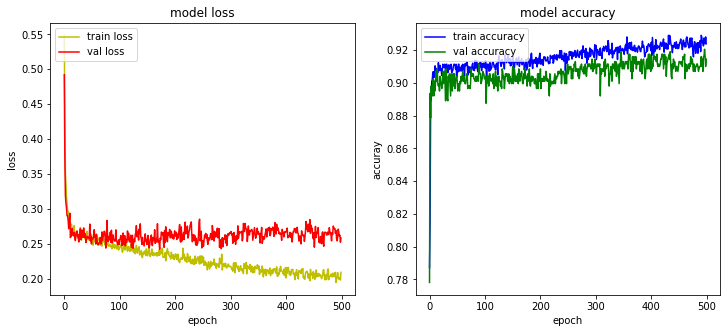

Test Accuracy = 0.9281437397003174
Test Recall = 0.6162468791007996
Test Precision = 0.9647528529167175


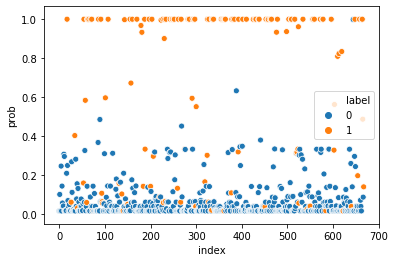

In [91]:
model = Sequential()
model.add(InputLayer((5,)))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('tanh'))
model.add(Dropout(0.3))

model.add(Dense(16))
model.add(Activation('tanh'))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(8))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('sigmoid'))

model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.Precision(name='precision')\
                    ])

hist = model.fit(std_train, y_train, epochs=500, \
             validation_data=(std_dev, y_dev), verbose=1, \
             use_multiprocessing=True)

loss_accuracy_recall_precision = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'label':y_test.label})

print(loss_accuracy_precision_recall)
visual_training(hist)
visual_model_performance(loss_accuracy_recall_precision, pred_and_label)

## Model 1 - Confusion Matrix

In [88]:
print(loss_accuracy_precision_recall)
# print(y_pred)
# print(y_test.label)
# display(pred_and_label)

[0.2114116600352133, 0.938622772693634, 0.6764355301856995, 0.9360998272895813]


# Model 2

668/668 [==============================] - 0s 34us/step
0.9041916131973267


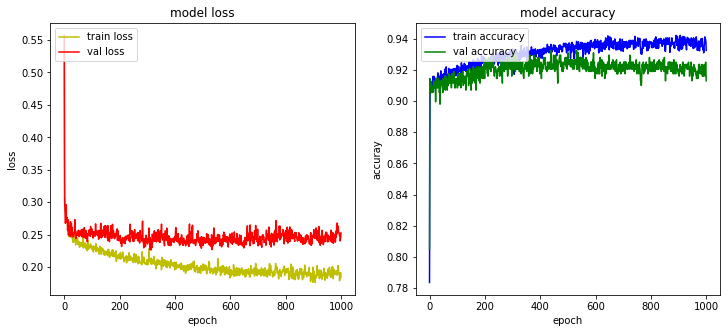

Test Accuracy = 0.9041916131973267


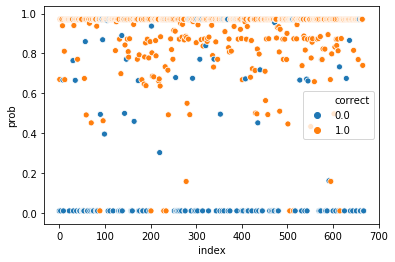

In [17]:
model = Sequential()
model.add(InputLayer((5,)))

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(16))
model.add(Activation('tanh'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('sigmoid'))

model.add(Dense(256))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)

# Model 3

668/668 [==============================] - 0s 34us/step
0.9041916131973267


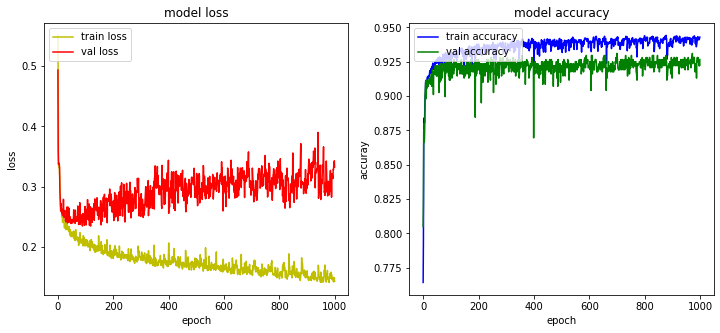

Test Accuracy = 0.9041916131973267


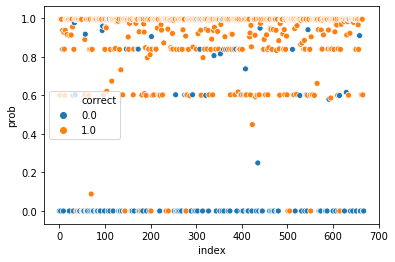

In [18]:
model = Sequential()
model.add(InputLayer((5,)))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('sigmoid'))

model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)

# Model 4

668/668 [==============================] - 0s 34us/step
0.9146706461906433


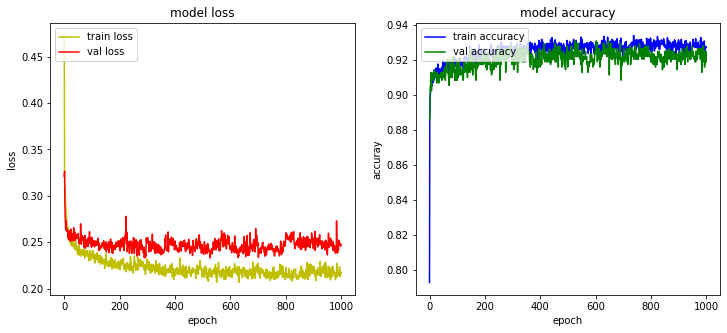

Test Accuracy = 0.9146706461906433


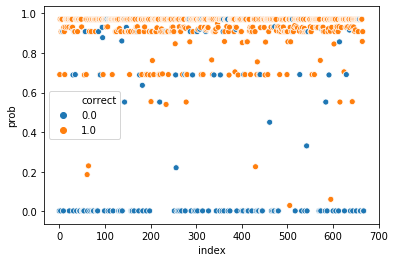

In [19]:
model = Sequential()
model.add(InputLayer((5,)))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('tanh'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)

# Model 5

668/668 [==============================] - 0s 40us/step
0.901197612285614


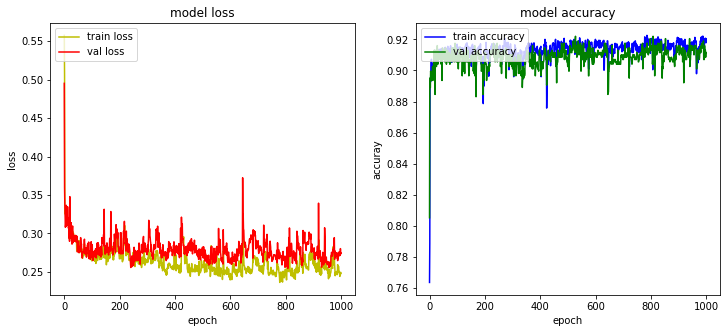

Test Accuracy = 0.901197612285614


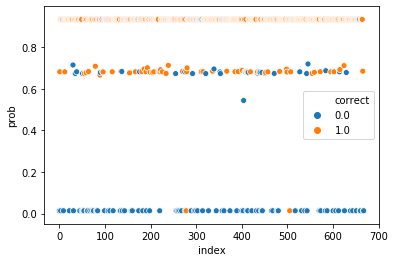

In [20]:
model = Sequential()
model.add(InputLayer((5,)))

model.add(Dense(64))
model.add(Activation('tanh'))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('tanh'))

model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(25))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(8))
model.add(Activation('tanh'))
model.add(Dropout(0.4))

model.add(Dense(32))
model.add(Activation('tanh'))

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)

# Model 6

668/668 [==============================] - 0s 45us/step
0.9071856141090393


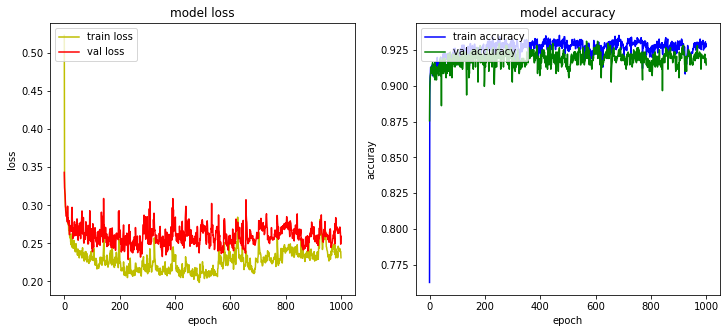

Test Accuracy = 0.9071856141090393


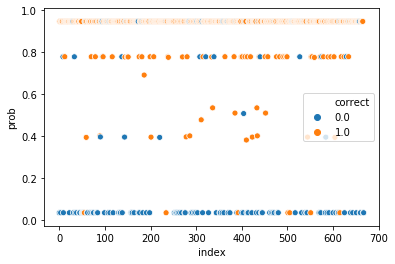

In [21]:
model = Sequential()
model.add(InputLayer((5,)))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(128))
model.add(Activation('tanh'))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(36))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('tanh'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)

# 이전 모델

# Model 7

668/668 [==============================] - 0s 34us/step
0.9056886434555054


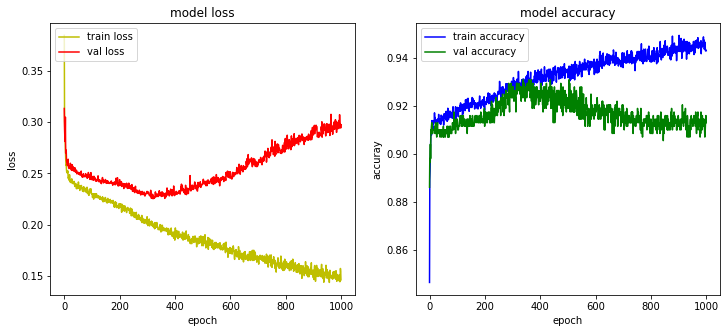

Test Accuracy = 0.9056886434555054


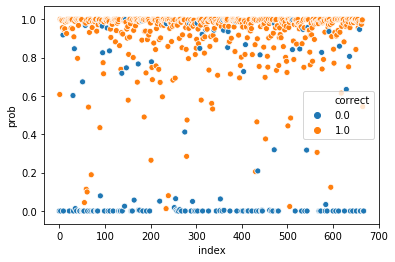

In [22]:
model = Sequential()
model.add(InputLayer((5,)))

model.add(Dense(25))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(32))
model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)

# Model 8

668/668 [==============================] - 0s 31us/step
0.923652708530426


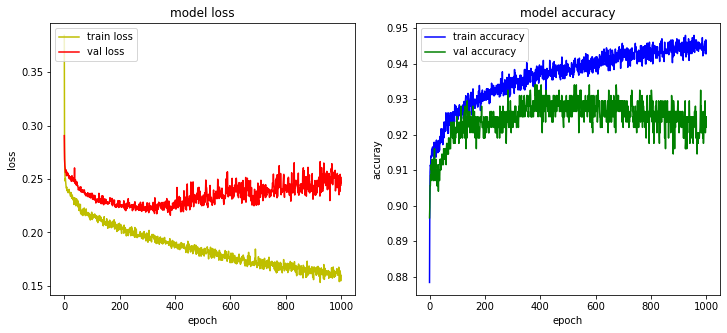

Test Accuracy = 0.923652708530426


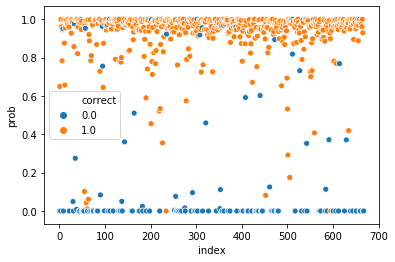

In [23]:
model = Sequential()

model.add(InputLayer((5,)))

model.add(Dense(25))
model.add(Activation('tanh'))

model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)

# Model 9

668/668 [==============================] - 0s 33us/step
0.8997005820274353


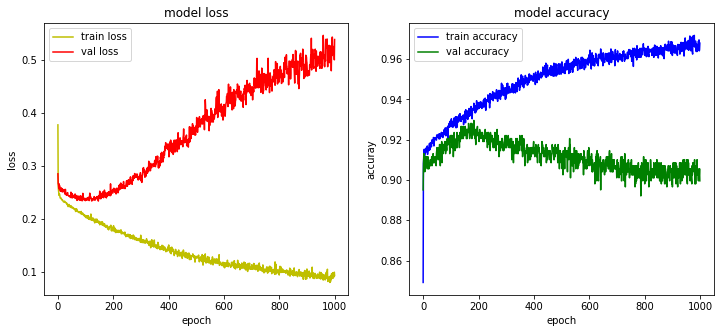

Test Accuracy = 0.8997005820274353


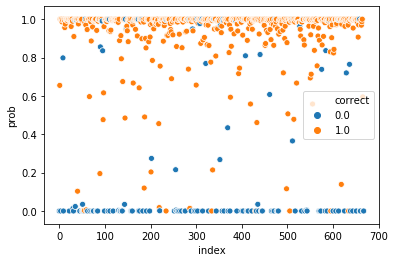

In [24]:
model = Sequential()

model.add(InputLayer((5,)))

model.add(Dense(25))
model.add(Activation('tanh'))

model.add(Dense(125))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)

# Model 10

668/668 [==============================] - 0s 39us/step
0.902694582939148


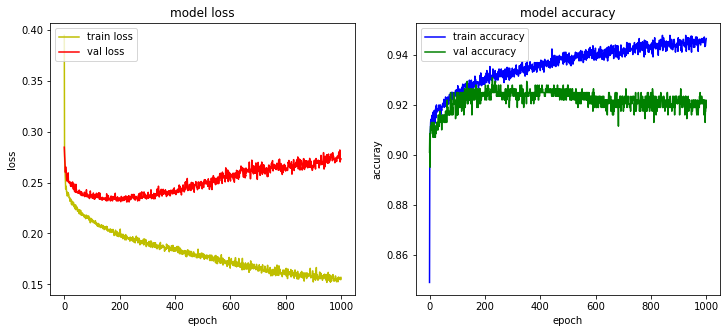

Test Accuracy = 0.902694582939148


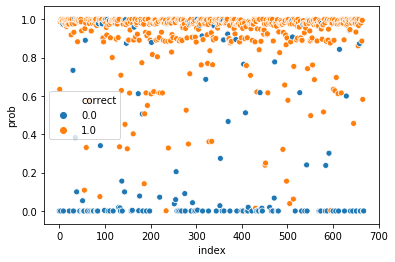

In [25]:
model = Sequential()

model.add(InputLayer((5,)))

model.add(Dense(25))
model.add(Activation('tanh'))

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('tanh'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(std_train, y_train, epochs=1000, \
             validation_data=(std_dev, y_dev), verbose=0, \
             use_multiprocessing=True)

loss_and_accuracy = model.evaluate(x=std_test, y=y_test)

y_pred = model.predict(std_test)
pred_and_label = pd.DataFrame({'index':range(len(y_test)),'prob':y_pred.T[0], 'correct':y_test.correct})

print(loss_and_accuracy[-1])
visual_training(hist)
visual_model_performance(loss_and_accuracy, pred_and_label)